<a href="https://colab.research.google.com/github/ericklmuniz/trabalho1GCS/blob/main/Aula_%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aula Prática: Árvores de Decisão

O objetivo desta aula é construir um modelo de predição de inadimplência de clientes que se aplicam para um empréstimo bancário.

###Passo 1: Importando as bibliotecas

Será necessário importar diversas bibliotecas para poder rodar o modelo de árvores de decisão. Mas há duas bibliotecas principais: `pandas` e `scikitlearn`.

A biblioteca `pandas` implementa a estrutura de dados `Dataframe` que possui consegue organizar dados de forma tabular (ideal para organizar os dados de um dataset).

Já a biblioteca `scikitlearn` implementa diversos algoritmos de Aprendizado de Máquina e fornece uma interface simples, que permite executar todo o pipeline de treino e teste de modelos de forma simplificada.

Outras bibliotecas acessórias são necessárias, como `numpy`, que é uma biblioteca matemática e `matplotlib` e `seaborn` que são bibliotecas de visualização de dados.

*Observação*: Para rodar esse código localmente, é necessário realizar a instalação de todas esssas bibliotecas antes de rodar este código. Para instalar uma biblioteca, rodamos o seguinte comando `pip install <nome_biblioteca>`

In [3]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão dos dados
from sklearn.model_selection import train_test_split

# Métricas de Avaliação
from sklearn import metrics
from sklearn.metrics import (f1_score,
                            accuracy_score,
                            recall_score,
                            precision_score,
                            confusion_matrix,
                            roc_auc_score)

# Algoritmos de Machine Learning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Ajustes de Hiperparametros
from sklearn.model_selection import GridSearchCV

# Optional para Annotations das funções
from typing import Optional

###Passo 2: Carregando o Dataset

####*Descrição dos Dados*

Nossa base de dados é um dataset público, disponibilizado pelo Center for Machine Learning and Intelligent Systems da Universidade da Califórnia, UCI.

Link do dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

O dataset que iremos utilizar é de um banco da Alemanha, doado para uso público em 1994. Toda a base de dados original está em Inglês. Foi feita uma tradução livre e pequenas manipulações de dados para fins didáticos.

A base de dados é composta pelas seguintes colunas.

* **saldo_corrente**: saldo na conta corrente (categórica).
* **duracao_emp_meses**: duração do empréstimo, em meses (numérica).
* **historico_credito**: histórico de crédito (categórica).
* **motivo**: motivo para pedido de empréstimo (categórica).
* **quantia**: valor do empréstimo pedido (numérica).
* **saldo_poupanca**: saldo na conta poupança (categórica).
* **tempo_empregado**: tempo no emprego atual (categórica).
* **porcentagem_renda**: porcentagem da renda comprometida pela parcela do empréstimo (numérica).
* **anos_residencia**: tempo de moradia na residência atual, em anos (numérica).
* **idade**: idade do cliente, em anos (numérica).
* **outro_credito**: se o cliente possui empréstimos em outros estabelecimentos (categórica).
* **residencia**: se mora em residência própria ou alugada (categórica).
* **qtd_emprestimos_existentes**: quantidade de empréstimos existentes neste banco (numérica).
* **emprego**: categoria de emprego (categórica).
* **dependentes**: quantidade de dependentes (numérica).
* **telefone**: se o cliente possui telefone, informação relevante na época (categórica).
* **inadimplente**: classificação se o cliente foi inadimplente ou não, nossa *variável objetivo*.





In [4]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

# Local do dataset online
url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/credito.csv'

# Carrega os dados em um DataFrame
data = pd.read_csv(url_dataset)
data.head()

,saldo_corrente,duracao_emp_meses,historico_credito,motivo,quantia,saldo_poupanca,tempo_empregado,porcentagem_renda,anos_residencia,idade,outro_credito,residencia,qtd_emprestimos_existentes,emprego,dependentes,telefone,inadimplente
0,< 0 DM,6.0,critico,moveis/eletrodomesticos,1169,desconhecido,> 7 anos,4.0,4.0,67,nenhum,propria,2,qualificado,1,sim,nao
1,1 - 200 DM,48.0,bom,moveis/eletrodomesticos,5951,< 100 DM,1 - 4 anos,2.0,2.0,22,nenhum,propria,1,qualificado,1,nao,sim
2,desconhecido,12.0,critico,educacao,2096,< 100 DM,4 - 7 anos,2.0,3.0,49,nenhum,propria,1,nao-qualificado,2,nao,nao
3,< 0 DM,42.0,bom,moveis/eletrodomesticos,7882,< 100 DM,4 - 7 anos,2.0,4.0,45,nenhum,outros,1,qualificado,2,nao,nao
4,< 0 DM,24.0,ruim,carro,4870,< 100 DM,1 - 4 anos,3.0,4.0,53,nenhum,outros,2,qualificado,2,nao,sim


###Passo 3: Análise Estatística dos dados

Iniciaremos nosso estudo avaliando algumas estatísticas do dataset que iremos utilizar:

In [5]:
# Verifica a dimensão dos dados
print(f'Dimensão dos dados: {data.shape}\n')

print(f'Esta base de dados tem {data.shape[0]} linhas e {data.shape[1]} colunas.')


Dimensão dos dados: (1000, 17)

Esta base de dados tem 1000 linhas e 17 colunas.


O método `describe` apresenta um resumo estatístico das variáveis numéricas do dataframe. Este método nos retorna as seguintes informações:
* Contagem de entradas de cada coluna.
* Média.
* Desvio Padrão.
* Valores mínimo e máximo de cada coluna.
* Primeiro quartil, Mediana e terceiro quartil.


In [6]:
# Algumas estatísticas sobre as variáveis numéricas
data.describe()

,duracao_emp_meses,quantia,porcentagem_renda,anos_residencia,idade,qtd_emprestimos_existentes,dependentes
count,996.000000,1000.000000,994.000000,997.000000,1000.000000,1000.000000,1000.000000
mean,20.914659,3271.258000,2.974849,2.844534,35.546000,1.407000,1.155000
std,12.081621,2822.736876,1.120338,1.105346,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Observações**:

* Os valores monetários estão em Deutsche Mark (DM), moeda da Alemanha na época, anterior ao Euro.
* A média de idade é aproximadamente 35 anos e a mediana é 33 anos.
* A média de valor dos empréstimos está em torno de 3271 DM (Deutsche Mark), mas há um grande range de 250 DM a 18434 DM.
* A média de parcelas dos empréstimos está em torno de 21 meses e a mediana em 18 meses.


Para analisar os dados das colunas Categóricas, podemos usar um outro trecho de código. A célula abaixo irá recuperar as colunas do tipo `object` e analisar as entradas de cada uma destas colunas usando a função `value_counts`.

In [7]:
# Lista de variáveis categóricas
colunas_cat = data.select_dtypes(include=['object']).columns.tolist()

# Estatísticas sobre as variáveis categóricas
for coluna in colunas_cat:
    print(f'### Coluna <{coluna}> ###')
    print(data[coluna].value_counts())
    print('-' * 40)


### Coluna <saldo_corrente> ###
saldo_corrente
desconhecido    394
< 0 DM          274
1 - 200 DM      269
> 200 DM         63
Name: count, dtype: int64
----------------------------------------
### Coluna <historico_credito> ###
historico_credito
bom          530
critico      293
ruim          88
muito bom     49
perfeito      40
Name: count, dtype: int64
----------------------------------------
### Coluna <motivo> ###
motivo
moveis/eletrodomesticos    473
carro                      337
negocios                    97
educacao                    59
renovacao                   22
carr0                       12
Name: count, dtype: int64
----------------------------------------
### Coluna <saldo_poupanca> ###
saldo_poupanca
< 100 DM         603
desconhecido     183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
----------------------------------------
### Coluna <tempo_empregado> ###
tempo_empregado
1 - 4 anos      339
> 7 anos        253
4 - 7 ano

**Observações**:
* Temos poucos clientes desempregados na base de dados.
* Há uma classe na coluna motivo que parece ter sofrido erro de digitação.
* A nossa variável alvo, inadimplente, está desbalanceada. Apenas 30% das observações estão na Classe 1 (inadimplente) e 70% na Classe 0 (não inadimplente).

A função `info` apresenta um resumo contendo o número de entrada não nulas e o tipo de cada uma das colunas do Dataframe.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   saldo_corrente              1000 non-null   object 
 1   duracao_emp_meses           996 non-null    float64
 2   historico_credito           1000 non-null   object 
 3   motivo                      1000 non-null   object 
 4   quantia                     1000 non-null   int64  
 5   saldo_poupanca              1000 non-null   object 
 6   tempo_empregado             1000 non-null   object 
 7   porcentagem_renda           994 non-null    float64
 8   anos_residencia             997 non-null    float64
 9   idade                       1000 non-null   int64  
 10  outro_credito               1000 non-null   object 
 11  residencia                  1000 non-null   object 
 12  qtd_emprestimos_existentes  1000 non-null   int64  
 13  emprego                     1000 n

Repare que temos dados nulos/faltantes, pois nem todas as colunas possuem 1000 entradas não-nulas.

Vamos executar um código para verificar exatamente quantos dados faltantes cada coluna tem.

In [9]:
# Verificando dados nulos
print('Colunas com dados nulos:')
display(data.isnull().sum()[data.isnull().sum() > 0])

Colunas com dados nulos:


duracao_emp_meses    4
porcentagem_renda    6
anos_residencia      3
dtype: int64

###Passo 4: Pré-Processamento

Na fase de Pré-Processamento vamos preparar o dataset para que ele seja utilizado pelo algoritmo de aprendizagem de máquina. Essa é uma etapa de extrema importância, pois ela serva para corrigir possíveis erros que possam haver nos dados, além de aplicar operações de normalização, que adequam o dataset para o algoritmo.

####Corrigindo erros no dataset

Como notado anteriormente, há um erro de digitação em uma das categorias do atributo motivo. Vamos analisar este ponto e corrigir conforme necessário.

In [10]:
# Exibe as categorias da variável motivo
data['motivo'].value_counts()

motivo
moveis/eletrodomesticos    473
carro                      337
negocios                    97
educacao                    59
renovacao                   22
carr0                       12
Name: count, dtype: int64

Vamos realizar a substituição da palavra `carr0` por `carro`

In [11]:
# Corrige o erro de digitação
corrige_carro = {'carr0': 'carro'}
data.replace(corrige_carro, inplace=True)

# Verifica as categorias novamente
data['motivo'].value_counts()

motivo
moveis/eletrodomesticos    473
carro                      349
negocios                    97
educacao                    59
renovacao                   22
Name: count, dtype: int64

Note que a entrada "carr0", que era aparentemente um erro de digitação, já não existe mais. Problema corrigido!

#### Transformando Variáveis Categóricas em Numéricas

Apesar do algoritmo ID3 lidar com variáveis categóricas, sua implementação na bibliotecas `scikit learn` não aceita valores categóricos em sua entrada. Precisamos então realizar a **discretização** dos dados, que consite em converter essas variáveis para dados numéricos.

Primeiramente, vamos converter as variáveis que contém dados ordinais, onde há uma relação de ordenamento dos dados. Para isso, vamos atribuir um valor inteiro, em ordem crescente, para cada categoria, de modo a manter a ordem existente nos dados.


In [12]:
# Convertendo variáveis Categóricas Ordinais
conversao_variaveis = {
    'saldo_corrente': {
        'desconhecido': -1,
        '< 0 DM': 1,
        '1 - 200 DM': 2,
        '> 200 DM': 3,
    },
    'historico_credito': {
        'critico': 1,
        'ruim': 2,
        'bom': 3,
        'muito bom': 4,
        'perfeito': 5
    },
    'saldo_poupanca': {
        'desconhecido': -1,
        '< 100 DM': 1,
        '100 - 500 DM': 2,
        '500 - 1000 DM': 3,
        '> 1000 DM': 4,
    },
    'tempo_empregado': {
        'desempregado': 1,
        '< 1 ano': 2,
        '1 - 4 anos': 3,
        '4 - 7 anos': 4,
        '> 7 anos': 5,
    },
    'telefone': {
        'nao': 1,
        'sim': 2,
    }
}

data.replace(conversao_variaveis, inplace=True)
data.sample(5)

,saldo_corrente,duracao_emp_meses,historico_credito,motivo,quantia,saldo_poupanca,tempo_empregado,porcentagem_renda,anos_residencia,idade,outro_credito,residencia,qtd_emprestimos_existentes,emprego,dependentes,telefone,inadimplente
607,2,36.0,3,moveis/eletrodomesticos,2671,2,3,4.0,4.0,50,nenhum,outros,1,qualificado,1,1,sim
520,-1,24.0,1,renovacao,5507,1,5,3.0,4.0,44,nenhum,outros,2,qualificado,1,1,nao
47,1,6.0,3,carro,1352,3,1,1.0,2.0,23,nenhum,alugada,1,desempregado,1,2,nao
797,-1,12.0,1,moveis/eletrodomesticos,1258,1,2,2.0,4.0,22,nenhum,alugada,2,nao-qualificado,1,1,nao
979,2,15.0,4,carro,1264,2,3,2.0,2.0,25,nenhum,alugada,1,qualificado,1,1,sim


#### Discretização de Variáveis não Ordinais

Para variáveis categóricas podemos aplicar a técnica de **OneHotEncoding**. Nesta técnica, cada categoria se transforma em uma coluna de valores binários (0 ou 1). Por exemplo, o atributo motivo que possui 5 categorias, vai se transformar em 4 colunas distintas.

Exemplo
O atributo motivo possui 5 categorias:

moveis/eletrodomesticos

1. moveis/eletrodomesticos
2. carro
3. negocios
4. educacao
5. renovacao

Ao aplicar a técnica de OneHotEncoding, o DataFrame ficaria da seguinte forma.

|motivo| motivo_carro | motivo_negocios | motivo_educação | motivo_renovação |
|:----:|:------------:|:---------------:|:---------------:|:----------------:|
| carro| 1            | 0               | 0               | 0                |
| negocios| 0            | 1               | 0               | 0                |
| educacao | 0            | 0               | 1               | 0                |
| renovacao| 0            | 0               | 0               | 1                |
| moveis/eletrodomesticos| 0            | 0               | 0               | 0                |

Para evitar a Multicolinearidade, nós configuramos a função para excluir a primeira coluna, pois ela não é necessária. Caso a observação não se encaixe em nenhuma das 4 categorias acima, ela obviamente vai se encaixar na quinta, que no nosso caso é a moveis/eletrodomesticos. Ter o valor 0 em todas as colunas significa que está nesta categoria.

Como essa técnica de OneHotEncoding deve ser aplicada apenas sobre as colunas categóricas, vamos isolar esse tipo de colunas.

In [13]:
# Gera a lista de variáveis categóricas
cols_cat = data.select_dtypes(include='object').columns.tolist()

# Removendo 'inadimplente' pois é nossa variável Alvo
cols_cat.remove('inadimplente')

cols_cat

['motivo', 'outro_credito', 'residencia', 'emprego']

E, finalmente, implementamos o OneHotEncoding.

In [14]:
# Implementa o OneHotEncoding
data = pd.get_dummies(data, columns=cols_cat, drop_first=True)

data.head()

,saldo_corrente,duracao_emp_meses,historico_credito,quantia,saldo_poupanca,tempo_empregado,porcentagem_renda,anos_residencia,idade,qtd_emprestimos_existentes,...,motivo_moveis/eletrodomesticos,motivo_negocios,motivo_renovacao,outro_credito_loja,outro_credito_nenhum,residencia_outros,residencia_propria,emprego_gerencial,emprego_nao-qualificado,emprego_qualificado
0,1,6.0,1,1169,-1,5,4.0,4.0,67,2,...,True,False,False,False,True,False,True,False,False,True
1,2,48.0,3,5951,1,3,2.0,2.0,22,1,...,True,False,False,False,True,False,True,False,False,True
2,-1,12.0,1,2096,1,4,2.0,3.0,49,1,...,False,False,False,False,True,False,True,False,True,False
3,1,42.0,3,7882,1,4,2.0,4.0,45,1,...,True,False,False,False,True,True,False,False,False,True
4,1,24.0,2,4870,1,3,3.0,4.0,53,2,...,False,False,False,False,True,True,False,False,False,True


#### Convertendo a Variável Objetivo

A variável `inadimplente` é a única variável que ainda precisa ser convertida. Para classificação binária (duas classes) vamos dividir as classes em Classe 0 (não) e Classe 1 (sim).

Desta forma as entradas 0 indicarão clientes não inadimplentes e 1 indica clientes inadimplentes.

In [15]:
# Convertendo a variável alvo
conversao_alvo = {
    'inadimplente': {'nao': 0, 'sim': 1}
}

data.replace(conversao_alvo, inplace=True)
data['inadimplente']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: inadimplente, Length: 1000, dtype: int64

#### Lidando com Valores Faltantes

Existem diversas formas de tratar valores faltantes. Nós podemos remover as entradas, substituir os valores faltantes com a Média ou Mediana das colunas, etc.

Neste exemplo, iremos substituir os valores faltantes pela Média dos valores da sua coluna.

In [16]:
# Imputando os valores nulos com a média
data = data.fillna(data.mean())

In [17]:
# Verifica valores nulos novamente
data.isnull().sum()

saldo_corrente                    0
duracao_emp_meses                 0
historico_credito                 0
quantia                           0
saldo_poupanca                    0
tempo_empregado                   0
porcentagem_renda                 0
anos_residencia                   0
idade                             0
qtd_emprestimos_existentes        0
dependentes                       0
telefone                          0
inadimplente                      0
motivo_educacao                   0
motivo_moveis/eletrodomesticos    0
motivo_negocios                   0
motivo_renovacao                  0
outro_credito_loja                0
outro_credito_nenhum              0
residencia_outros                 0
residencia_propria                0
emprego_gerencial                 0
emprego_nao-qualificado           0
emprego_qualificado               0
dtype: int64

###Passo 5: Divisão dos Dados

Será necessário dividir o dataset em quatro conjuntos: precisamos separar a variável objetivo das demais features do dataset. E temos também que dividir os dados em conjuntos de treino e teste.

É comum chamarmos o dataset contendo as features como `X` e o dataset contendo a variável objetivo como `y`. Adotaremos essa nomenclatura neste exemplo.

In [18]:
# Variáveis independentes (características)
X = data.drop(['inadimplente'], axis=1)

# Variável dependente (alvo)
y = data['inadimplente']

Precisamos agora dividir a nossa base de dados entre **Treino** e **Teste**. Vamos separar uma parte dos dados (80% neste caso) para realizar o treino do modelo e uma outra parte (20%) para testarmos e se o modelo de fato aprendeu, ou se apenas “decorou” respostas e se “ajustou demais” ao problema (Overfitting).

Como temos um certo desbalanceio na nossa variável alvo, é interessante mantermos as mesmas proporções de classes positivas e negativas tanto na base de treino quanto na de teste. A divisão é aleatória, e não devemos perder esta proporção.

Para isso, iremos fazer uso do argumento `stratify=y` da função `train_test_split` disponível na biblioteca `Scikit-learn`. Este argumento irá manter as devidas proporções das classes de `y` para treino e teste.

In [19]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=1,
                                                   stratify=y) # mantém as proporções das classes


In [20]:
# Verifica as proporções de classes nos dados
print('### Proporção de Classes em Treino ###')
print(f'Porcentagem de entradas Classe 0: {y_train.value_counts(normalize=True).values[0] * 100}%')
print(f'Porcentagem de entradas Classe 1: {y_train.value_counts(normalize=True).values[1] * 100}%')
print()

print('### Proporção de Classes em Teste ###')
print(f'Porcentagem de entradas Classe 0: {y_test.value_counts(normalize=True).values[0] * 100}%')
print(f'Porcentagem de entradas Classe 1: {y_test.value_counts(normalize=True).values[1] * 100}%')


### Proporção de Classes em Treino ###
Porcentagem de entradas Classe 0: 70.0%
Porcentagem de entradas Classe 1: 30.0%

### Proporção de Classes em Teste ###
Porcentagem de entradas Classe 0: 70.0%
Porcentagem de entradas Classe 1: 30.0%


###Passo 6: Medidas de Performance

Após ter um modelo treinado, temos de avaliar a capacidade dele de realizar predições. Para isso, realizamos a predição sobre o dataset de teste e comparamos com a saída esperada, conforme mostrado na figura abaixo:

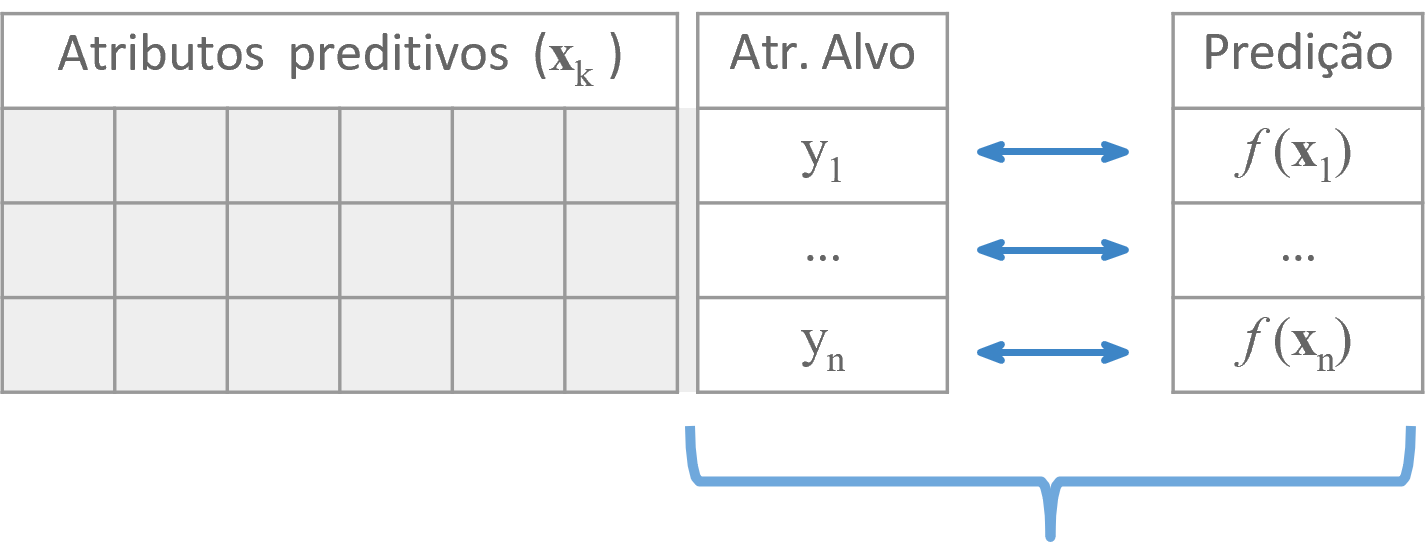

Podemos sumarizar esse processo usando uma **matriz de confusão**, que é uma representação tabular da Classe Prevista vs a Classe Real. Ela possui a seguinte representação:

<img src="https://brains.dev/wp-content/uploads/2023/01/cm1.png" alt="drawing" style="width:100px;"/>


Em problemas de classiﬁcação binária, usualmente uma classe (de interesse) é denotada como Positiva (+) e a outra como Negativa (-), e são quantiﬁcados os valores de:

* **Verdadeiros Positivos (TP)**: instâncias positivas corretamente classiﬁcadas como positivas
* **Verdadeiros Negativos (TN)**: instâncias negativas corretamente classiﬁcadas como negativas
* **Falsos Positivos (FP)**: instâncias negativas incorretamente classiﬁcadas como positivas
* **Falsos Negativos (FN)**: instâncias positivas incorretamente classiﬁcadas como negativas




Algumas medidas que podemos calcular sobre a matriz de confusão:

**Acurácia**: A Acurácia (Accuracy) é provavelmente a forma mais intuitiva de se medir a performance do modelo. É só vermos, de todos os exemplos que temos, quantos ele acertou. Se fornecemos 100 exemplos e o modelo acertou 90, temos uma Acurácia de 90/100. Ou seja, 90%.

$$Acc=\frac{TP+TN}{TP+TN+FP+FN}$$

A  acurácia  não  é  uma  boa  métrica  para  problemas  com  dados 	desbalanceados, isto é, quando há desequilíbrio no número de instâncias por classe.

Através da matriz de confusão, é possível extrair outras medidas para 	avaliar os diferentes tipos de erros e acertos do modelo de classiﬁcação.




**Precisão**: A Precisão (Precision) é definida como a fração dos resultados positivos corretos em relação a todos os resultados positivos produzidos pelo modelo. A pergunta que Precisão tenta responder é: Qual a proporção de predições positivas que estavam realmente corretas?

$$Precisão = \frac{TP}{TP+FP}$$

**Revocação (recall)**: A revocação consiste na fração dos resultados positivos corretos em relação a todos os resultados positivos reais. A pergunta que Recall tenta responder é: Qual a proporção de valores positivos que foi identificada corretamente?

$$Revocacao = \frac{TP}{TP+FN}$$

**F1-Score**: O F1-Score também é conhecido como *F-score* ou *F-measure*. É uma métrica que leva em consideração a Precisão e a Revocação. Pode ser usado como uma forma de buscar equilíbrio entre as duas medidas. Essa medida consiste na média harmônica da Precisão e da Revocação. Assim sendo, ele leva em consideração tanto os erros de Falso Positivos (FP) quanto os de Falso Negativos (FN). A fórmula do F1-Score é a seguinte.

$$F1=\frac{2∗Precisao∗Revocacao}{Precisao +Revocacao}$$

O maior valor possível para o F1-Score é 1.0, indicando Precisão e Recall perfeitos, e o valor mínimo possível é 0.0.

**Leia mais**: [neste artigo](https://brains.dev/2023/medidas-de-performance-modelos-de-classificacao/)

---
Iremos agora declarar algumas funções úteis para monitorarmos a performance dos nossos modelos.



In [21]:
def performance_modelo_classificacao(
    model: object,
    flag: Optional[bool] = True):

    '''
    Função para computar as diferentes métricas de performance para modelos de classificação.

    model: modelo para prever os valores de X
    flag: se imprimimos ou não os resultados
    '''

    # Lista para armazenar os resultados de Treino e Validação
    score_list = []

    # Predição em Treino e Validação
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Acurácia do modelo
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    # Recall do modelo
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)

    # Precisão do modelo
    train_prec = precision_score(y_train, pred_train)
    test_prec = precision_score(y_test, pred_test)

    # F1-Score do modelo
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)

    # Popula a lista
    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_prec, test_prec, train_f1, test_f1))

    # Imprime a lista se flag=True (default)
    if flag:
        print(f'Acurácia na base de Treino: {train_acc}')
        print(f'Acurácia na base de Teste: {test_acc}')
        print(f'\nRecall na base de Treino: {train_recall}')
        print(f'Recall na base de Teste: {test_recall}')
        print(f'\nPrecisão na base de Treino: {train_prec}')
        print(f'Precisão na base de Teste: {test_prec}')
        print(f'\nF1-Score na base de Treino: {train_f1}')
        print(f'F1-Score na base de Teste: {test_f1}')

    # Retorna a lista de valores em Treino e Validação
    return score_list

In [22]:
def matriz_confusao(
    model: object,
    X: pd.DataFrame,
    y_actual: pd.Series,
    labels: Optional[tuple] = (1, 0)):

    '''
    Plota a Matriz de Confusão com porcentagens.

    model: modelo para prever os valores de X
    X: atributos usados para a classficação
    y_actual: classificação real, variável alvo
    '''

    # Predição em Validação
    y_predict = model.predict(X)

    # Pega os dados da Matriz de Confusão
    cm = confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=['Real - Não (0)', 'Real - Sim (1)'],
                        columns=['Previsto - Não (0)', 'Previsto - Sim (1)'])

    # List of labels for the Confusion Matrix
    group_counts = [f'{value:.0f}' for value in cm.flatten()]
    group_percentages = [f'{value:.2f}%' for value in (cm.flatten()/np.sum(cm))*100]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.xlabel('Classe Prevista', fontweight='bold')
    plt.ylabel('Classe Real', fontweight='bold')
    plt.show()

###Passo 7: Treino do Modelo

O treino do nosso primeiro modelo vai ser extremamente simples. Nós iremos usar a classe `sklearn.tree.DecisionTreeClassifier` para treinar o modelo de Árvore de Decisão.

Para isso iremos instanciar um objeto `DecisionTreeClassifier` e vamos fazer com que ele se ajuste aos dados de treinamento, com o método `fit`.

In [23]:
# Instanciando o Modelo
arvore_d = DecisionTreeClassifier(criterion="entropy", random_state=1)

# Treinando o modelo
arvore_d.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

Nosso modelo está treinado! Vamos agora rodar as funções que calculam as métricas de avaliação para medir o desempenho dos dados nos conjuntos de treino e de teste



In [24]:
arvore_d_scores = performance_modelo_classificacao(arvore_d)

Acurácia na base de Treino: 1.0
Acurácia na base de Teste: 0.73

Recall na base de Treino: 1.0
Recall na base de Teste: 0.55

Precisão na base de Treino: 1.0
Precisão na base de Teste: 0.55

F1-Score na base de Treino: 1.0
F1-Score na base de Teste: 0.55


Podemos notar que houve **Overfitting** no nosso modelo! A Árvore de Decisão cresceu sem controle e acertou 100% de todas as observações de treino, mas falhou nos dados de teste. Aparentemente o modelo está decorando as respostas da base de treino e sua performance real está similar a jogar cara ou coroa.

Vamos tentar visualizar isso na Matriz de Confusão.



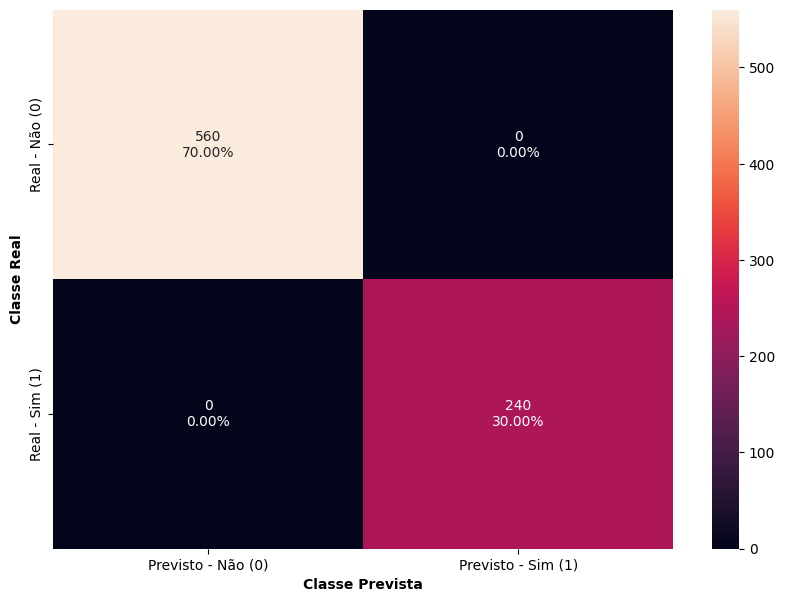

In [25]:
# Matriz de Confusão de treino
matriz_confusao(arvore_d, X_train, y_train)

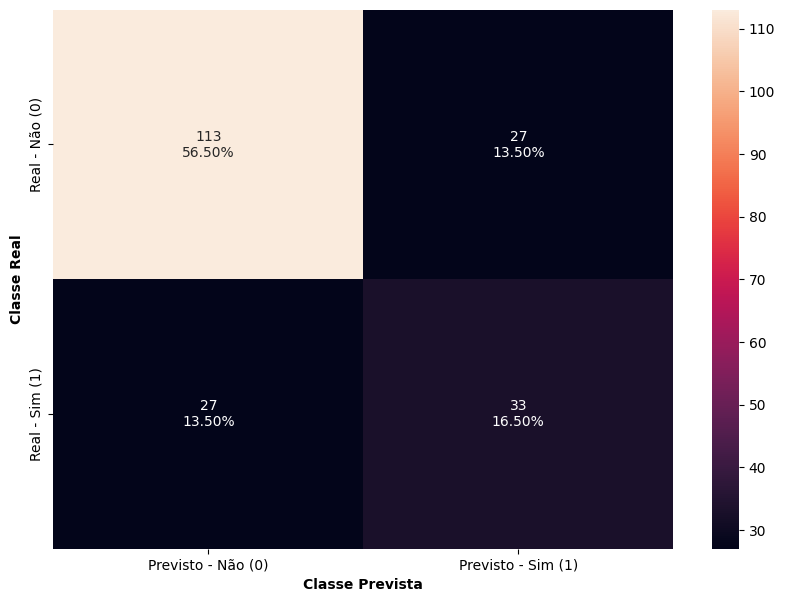

In [26]:
# Matriz de Confusão de teste
matriz_confusao(arvore_d, X_test, y_test)

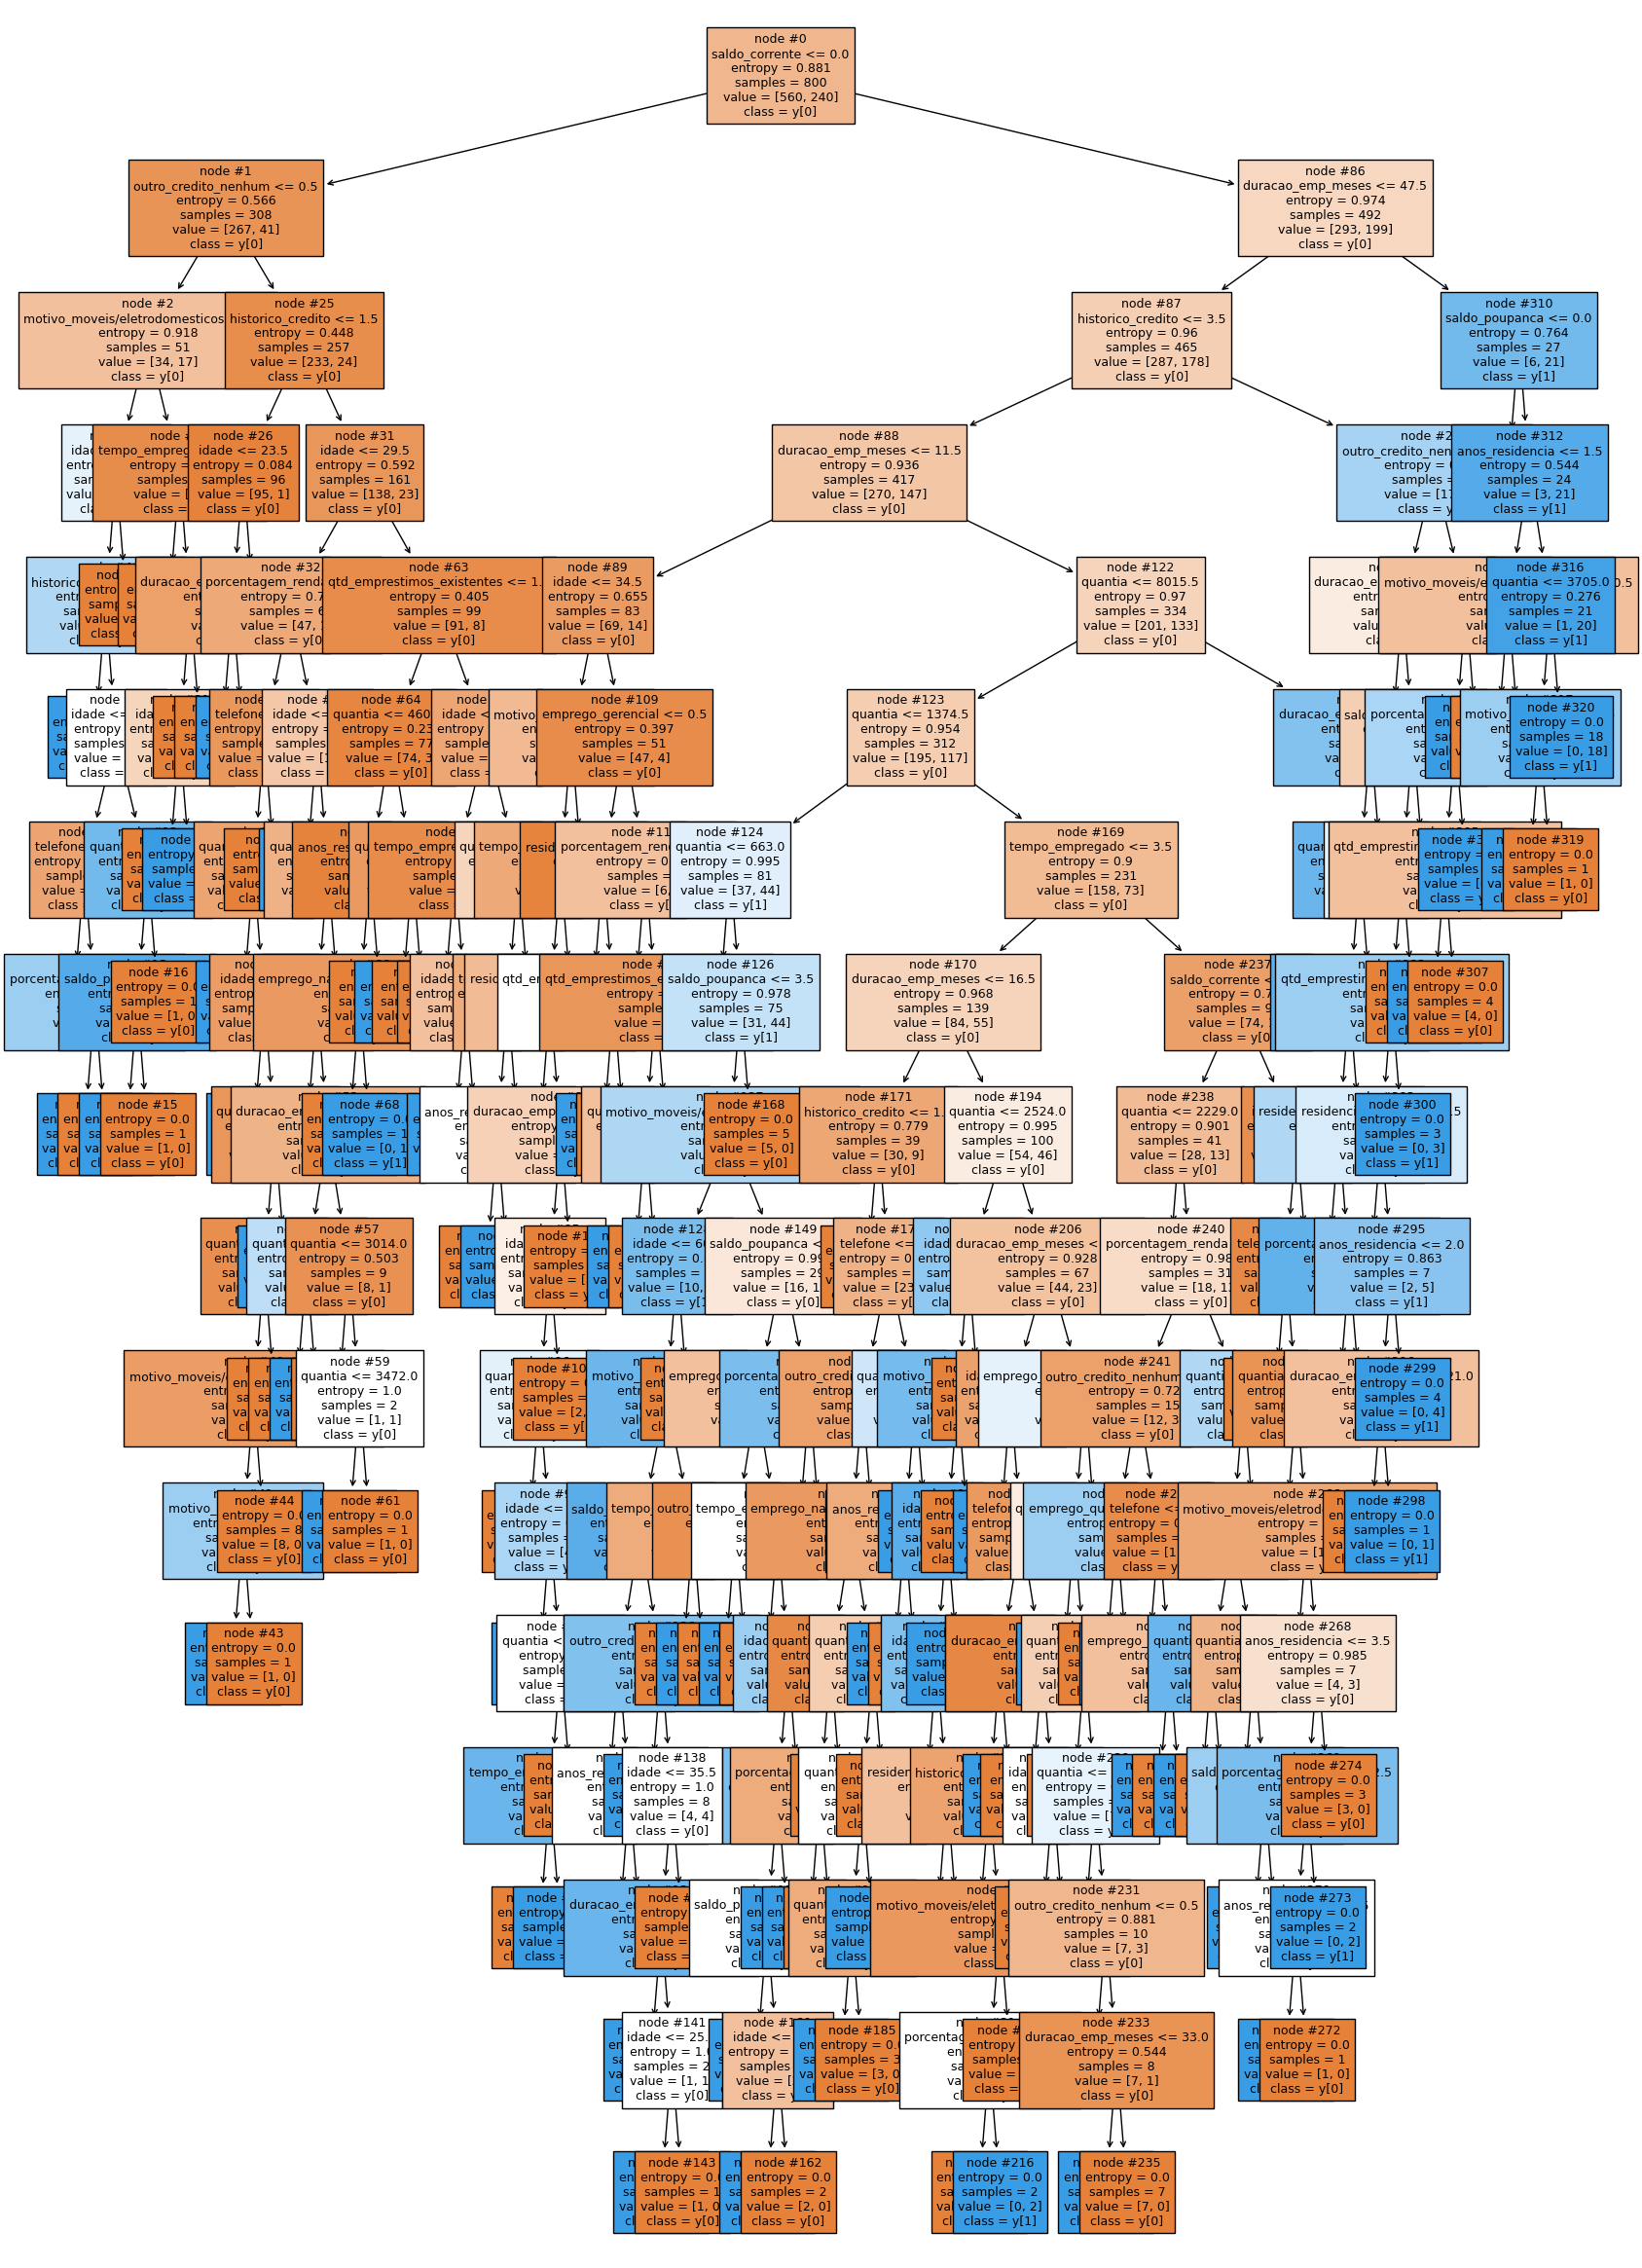

In [27]:
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 30))
tree.plot_tree(arvore_d, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True);

A árvore aprendida pelo modelo é muito complexa e profunda! Modelos complexos demais tendem ao **Overfitting**. Para evitar que nossas Árvores de Decisão crescam fora de controle, faremos uso de uma técnica de Poda: Vamos fazer a **Pré-Poda** na árvore de decisão!

###Passo 8: Estratégias de Poda

Podemos controlar a profundidade de uma Árvore de Decisão para deixá-la mais simples. Para isso, setamos o parâmetro `max_depth` ao instanciar o objeto do modelo.

In [28]:
# Instanciando o Modelo
arvore_d1 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=3)

# Treinando o modelo
arvore_d1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

Vamos recalcular as métricas para o novo modelo gerado:

In [29]:
arvore_d1_scores = performance_modelo_classificacao(arvore_d1)

Acurácia na base de Treino: 0.7425
Acurácia na base de Teste: 0.745

Recall na base de Treino: 0.2791666666666667
Recall na base de Teste: 0.35

Precisão na base de Treino: 0.67
Precisão na base de Teste: 0.6363636363636364

F1-Score na base de Treino: 0.3941176470588236
F1-Score na base de Teste: 0.45161290322580644


Agora temos um **Underfitting** no modelo! Talvez ele esteja simples demais para aprender algo sobre os dados de treino.

Vamos analisar novamente a Matriz de Confusão.

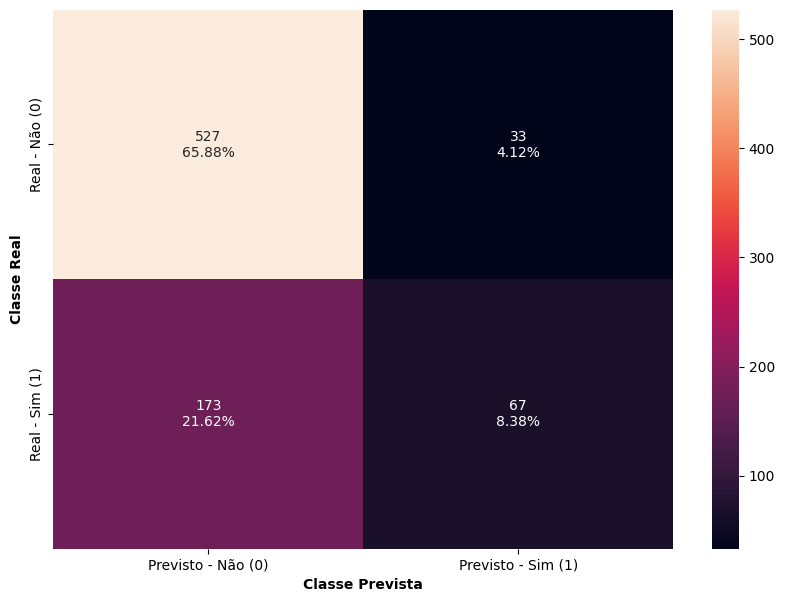

In [30]:
# Matriz de Confusão de treino
matriz_confusao(arvore_d1, X_train, y_train)

Vamos verificar a árvore aprendida por este modelo:

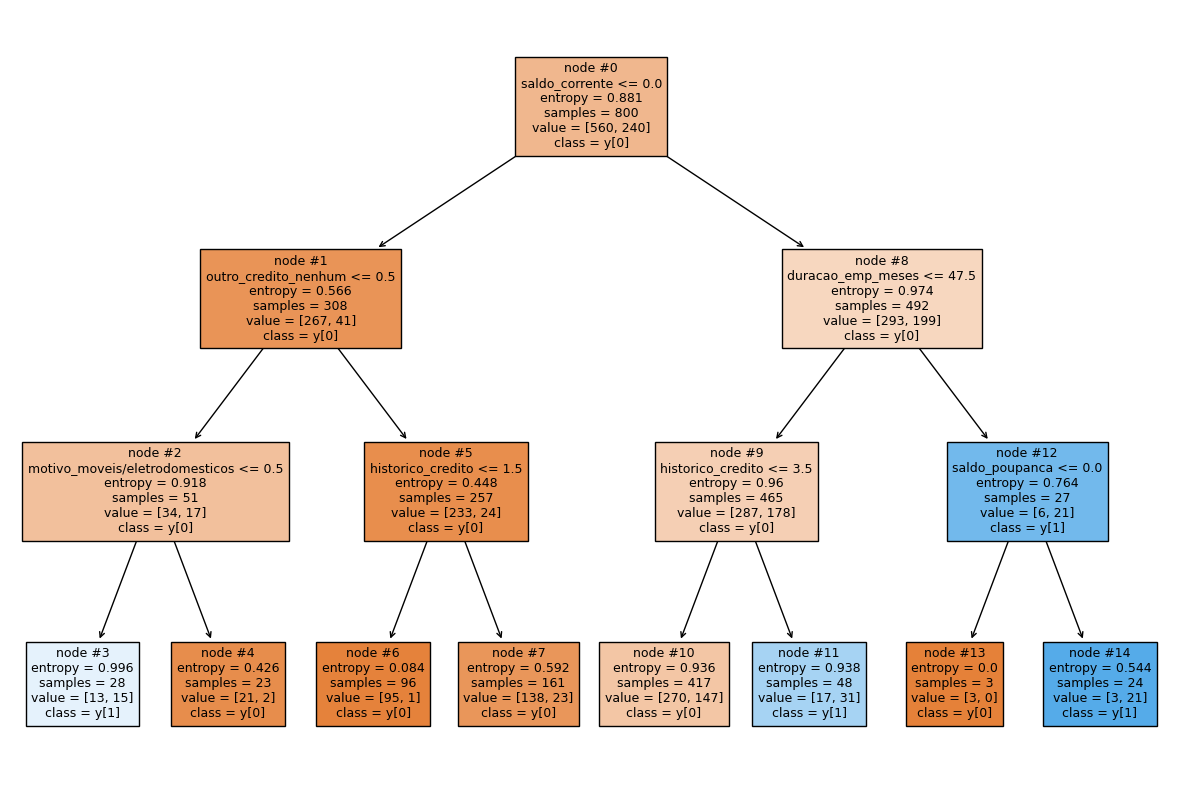

In [31]:
feature_names = list(X_train.columns)

plt.figure(figsize=(15, 10))
tree.plot_tree(arvore_d1, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True);

Perceba como a entropia em algumas folhas da árvore continua alta! É isto que está causando o underfitting nos dados

###Passo 9: Tunining de Hiperparâmetros

O Tuning de Hiperparâmatros é o processo de realizar alterações nos parâmetros de um modelo com o intuíto de melhorar a sua performance.

Para isso podemos usar a classe ``GridSearchCV``, que fará uma série de tentativas combinando diferentes parâmetros definidos dentro de uma grade e implementando a Validação Cruzada (Cross Validation) para chegar até a melhor combinação.

In [32]:
# Escolhe o Algoritmo
algo = DecisionTreeClassifier(criterion="entropy", random_state=1)

# Grade de parâmetros para combinar
parameters = {'max_depth': np.arange(1, 10),
             'min_samples_leaf': [1, 2, 5, 7, 10, 15, 20],
             'max_leaf_nodes': [2, 3, 5, 10],
             'min_impurity_decrease': [0.001, 0.01, 0.1]
             }

# Métrica usada para comparar as combinações de parâmetros
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Roda a Grid Search
grid_obj = GridSearchCV(algo, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Cria o modelo com a melhor combinação
arvore_d2 = grid_obj.best_estimator_

# Treina o modelo
arvore_d2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=15,
                       random_state=1)

Você deve ter notado que todas essas tentativas de diferentes combinações de parâmetros demoram um pouco para executar. Mas ao final é mostrado qual o melhor modelo gerado. No nosso exemplo, a profundidade ideal é de 6 níveis, com 10 nós folhas. O algoritmo escolheu essa melhor combinação dentro do espaço amostral que oferecemos pra ele.

Podemos notar uma melhora nas métricas do modelo. Veja abaixo:

In [33]:
arvore_d2_scores = performance_modelo_classificacao(arvore_d2)

Acurácia na base de Treino: 0.76
Acurácia na base de Teste: 0.74

Recall na base de Treino: 0.5291666666666667
Recall na base de Teste: 0.5333333333333333

Precisão na base de Treino: 0.616504854368932
Precisão na base de Teste: 0.5714285714285714

F1-Score na base de Treino: 0.569506726457399
F1-Score na base de Teste: 0.5517241379310344


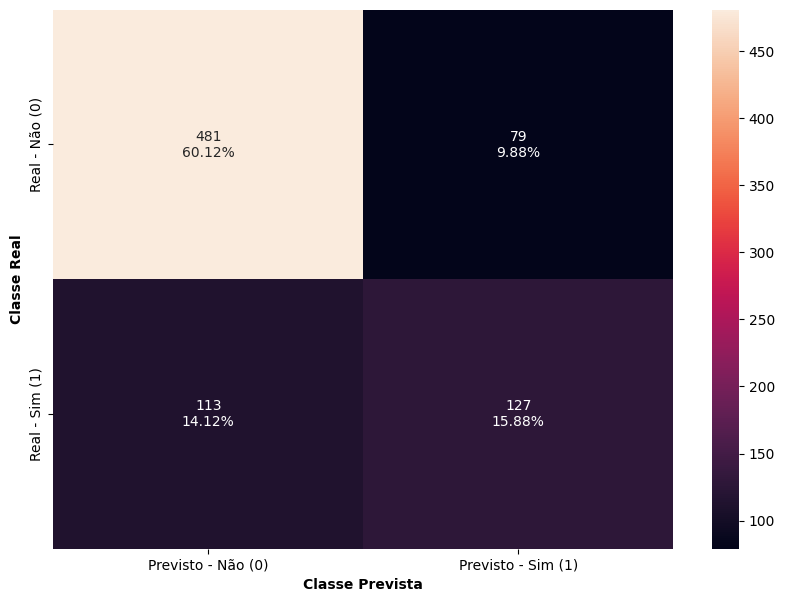

In [34]:
# Matriz de Confusão de treino
matriz_confusao(arvore_d2, X_train, y_train)

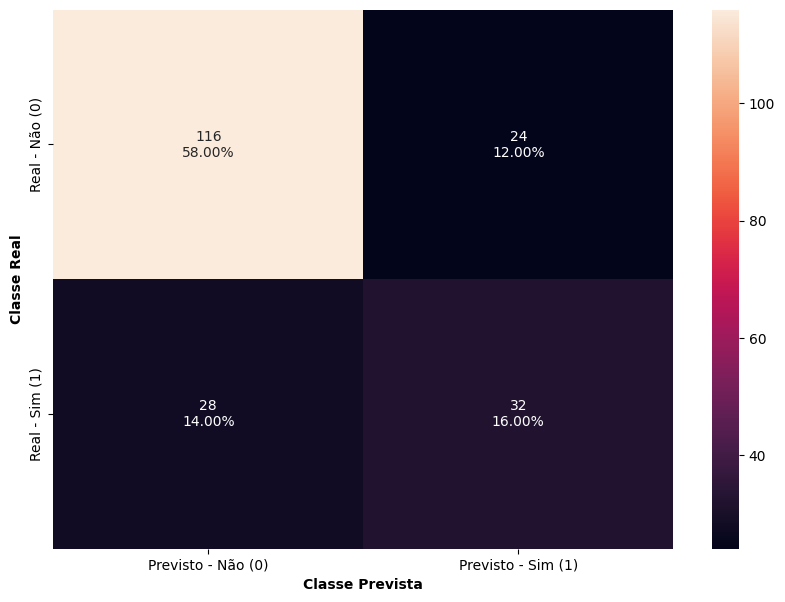

In [35]:
# Matriz de Confusão de teste
matriz_confusao(arvore_d2, X_test, y_test)

###Resumo

Vamos listar todos os modelos para compararmos as métricas de performance.

In [36]:
# Lista com todos os modelos
modelos = ['Árvore de Decisão',
          'Árvore de Decisão Podada',
          'Árvore de Decisão Tunada']

# Nomes das colunas
colunas = ['Treino_Acurarcia', 'Val_Acurarcia', 'Treino_Recall', 'Val_Recall',
          'Treino_Precisao', 'Val_Precisao', 'Treino_F1', 'Val_F1']

# DataFrame com todos os modelos e seus respectivos scores
modelos_scores = pd.DataFrame([arvore_d_scores, arvore_d1_scores, arvore_d2_scores],
                             columns=colunas, index=modelos).apply(lambda x: round(x, 2))

modelos_scores.T

,Árvore de Decisão,Árvore de Decisão Podada,Árvore de Decisão Tunada
Treino_Acurarcia,1.00,0.74,0.76
Val_Acurarcia,0.73,0.74,0.74
Treino_Recall,1.00,0.28,0.53
Val_Recall,0.55,0.35,0.53
Treino_Precisao,1.00,0.67,0.62
Val_Precisao,0.55,0.64,0.57
Treino_F1,1.00,0.39,0.57
Val_F1,0.55,0.45,0.55


###Fonte:

Documentação da classe `DecisionTreeClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Tutorial que serviu de base para esta aula: https://brains.dev/2023/pratica-arvores-de-decisao/


###Exercício Avaliativo

Estude a criação de um modelo de Florestas Aleatórias (Classe `RandomForestClassifier` do `scikitlearn` [Veja a documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) e implemente um modelo que classifique o conjunto de dados desta aula. Estude os parâmetros deste modelo e tente configurá-los para conseguir o melhor modelo possível (Usar o `GridSearch` para buscar esses modelos pode ser uma boa ideia 😉).

**O que deve ser entregue?** - Faça o download desse arquivo em Arquivo - Fazer Download - Baixar o .ipynb e envie no moodle. Antes de baixar, garanta que todas as células tenham sido executadas e que a saídas estejam sendo mostradas.


In [37]:
print("<SEU NOME AQUI>")

<SEU NOME AQUI>


In [38]:
# Seu código aqui!